In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [8]:
X=np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0],[0,0,0,1]])
y=np.array([0,1,0,1,0])

In [14]:
np.unique(y)
y==0

array([ True, False,  True, False,  True])

In [12]:
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 3]), 1: array([2, 0, 2, 1])}


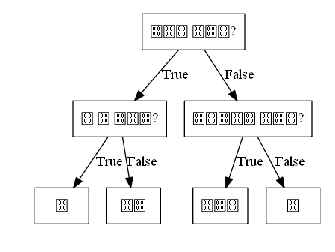

In [22]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

mglearn.plots.plot_animal_tree()

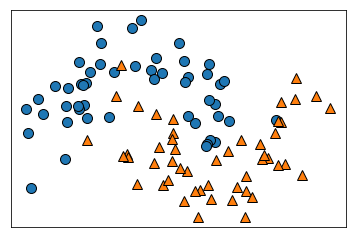

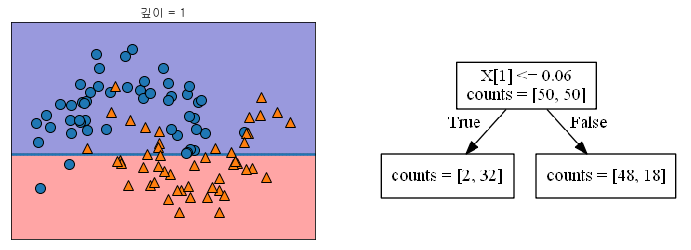

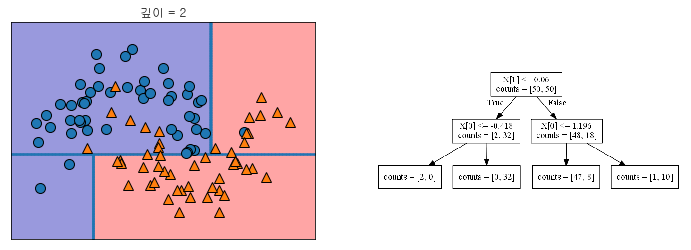

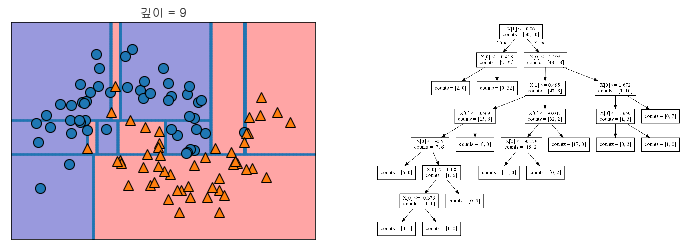

In [23]:
mglearn.plots.plot_tree_progressive()

In [ ]:
import sys
print(sys.version)
sys.path


In [ ]:
import matplotlib.font_manager as fm

print(len(fm.fontManager.ttflist))
for i, x in enumerate(fm.fontManager.ttflist):
    print(i, x.name)

In [ ]:
from matplotlib import get_cachedir
print(get_cachedir())

In [ ]:
import matplotlib.font_manager as fm

print(len(fm.fontManager.ttflist))
for i, x in enumerate(fm.fontManager.ttflist):
    print(i, x.name)

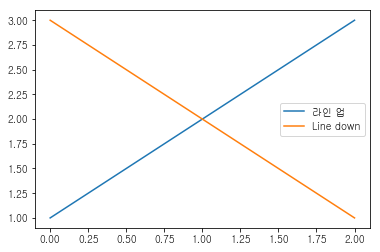

In [6]:
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

x_numbers = [1,2,3]
y_numbers = [2,4,6]
from pylab import plt, show
#plot(x_numbers, y_numbers, label="test")
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ["라인 업", 'Line down'])
show()


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [10]:
tree=DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)


In [12]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 144: illegal multibyte sequence

In [13]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


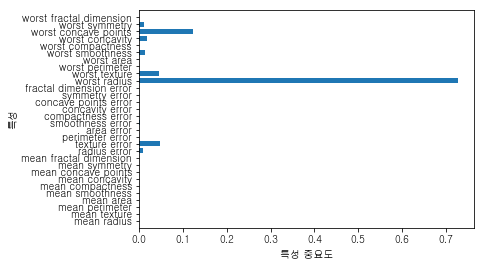

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)


Feature importances: [0. 1.]


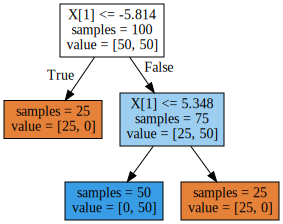

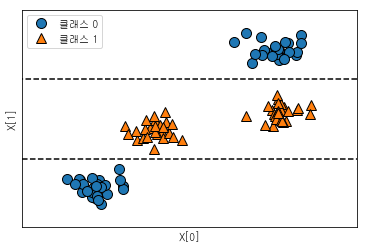

In [24]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'가격 ($/Mbyte)')

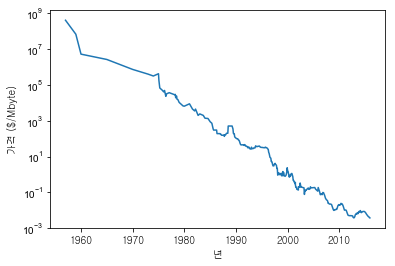

In [41]:
import pandas as pd
import os
ram_prices = pd.read_csv("C:\\Users\\la\\Anaconda3\\Lib\\site-packages\\mglearn\\data\\ram_price.csv")

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train=ram_prices[ram_prices.date <2000]
data_test=ram_prices[ram_prices.date >=2000]

X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train, y_train)

X_all =ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

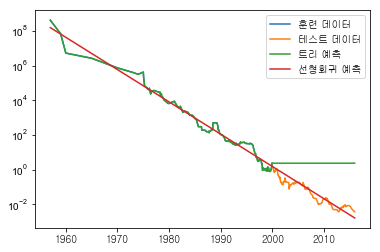

In [51]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
forest=RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

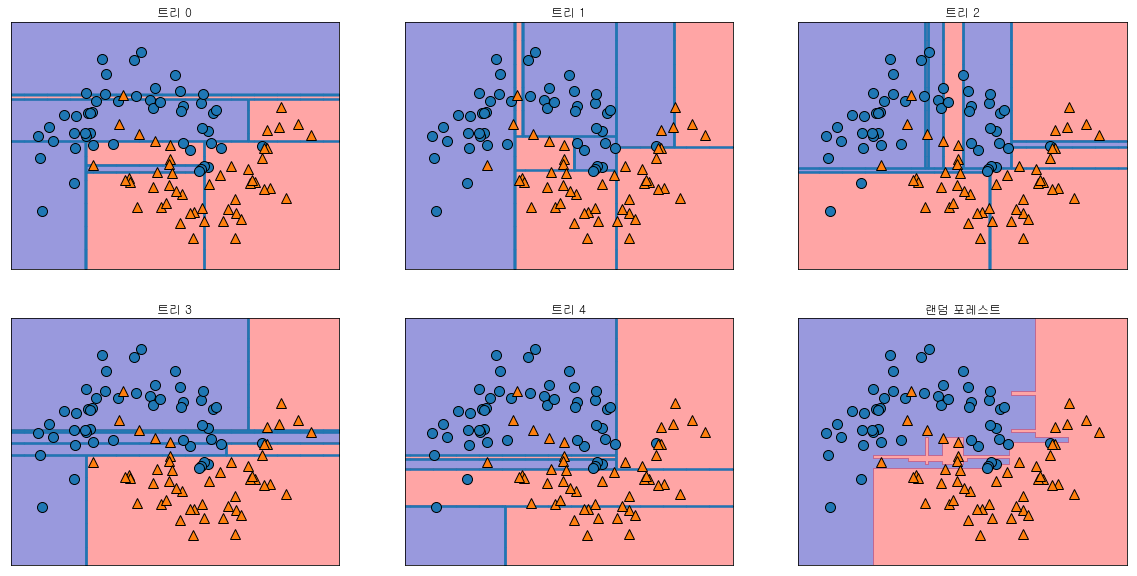

In [61]:
fig,axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


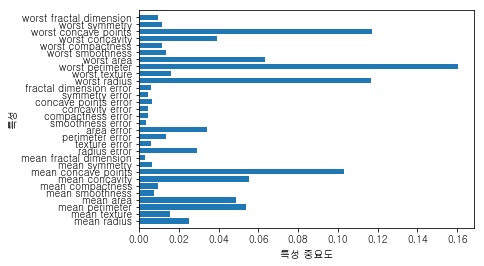

In [63]:
plot_feature_importances_cancer(forest)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt=GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

1.0
0.958041958041958


In [65]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


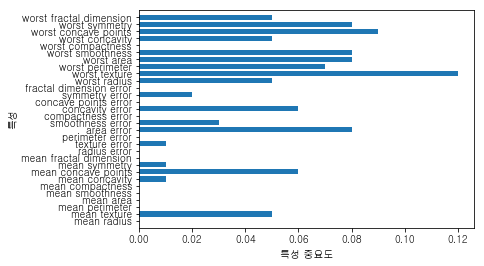

In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)